In [38]:

# setting logging to print only error messages from Sklearnex
import logging
logging.basicConfig()
logging.getLogger("SKLEARNEX").setLevel(logging.ERROR)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from datetime import datetime

#import tensorflow as tf
import os

from sklearn.metrics import mean_squared_error,mean_absolute_error
import math

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(palette="Set2")


def get_mda(y, yhat):
    """Mean Directional Accuracy, as per:
    https://www.wikiwand.com/en/Mean_Directional_Accuracy
    """
    a = np.sign(np.diff(y))
    b = np.sign(np.diff(yhat))
    return np.sum(a == b)/a.shape[0]

In [39]:
import os
os.getcwd()

'C:\\Users\\akash\\OneDrive\\Desktop\\ALL CODES\\LSTM ALL'

In [40]:
!pip install tensorflow


# Importing necessary libaries

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

# Read the data

In [42]:
df=pd.read_csv("APPLE BP DATA.csv")

In [43]:
df.head()

,Date,Open,High,Low,Close,Volume,NASDAQ,Change
0,01-04-2014,19.205713,19.352501,19.170357,19.344643,200760000,3658.399902,NaN
1,02-04-2014,19.370714,19.410000,19.295000,19.376785,180420800,3665.989990,0.032142
2,03-04-2014,19.335358,19.375000,19.201429,19.242500,162344000,3637.580078,-0.134285
3,04-04-2014,19.278929,19.285713,18.949286,18.993570,275251200,3539.379883,-0.248930
4,07-04-2014,18.857857,18.960714,18.638929,18.695356,289850400,3507.750000,-0.298214


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2205 non-null   object 
 1   Open    2205 non-null   float64
 2   High    2205 non-null   float64
 3   Low     2205 non-null   float64
 4   Close   2205 non-null   float64
 5   Volume  2205 non-null   int64  
 6   NASDAQ  2205 non-null   float64
 7   Change  2204 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 137.9+ KB


# Data Preprocessing

In [45]:
df["Date"] = pd.to_datetime(df["Date"])

In [46]:
df.set_index('Date',inplace=True)

In [47]:
df.head()

,Open,High,Low,Close,Volume,NASDAQ,Change
Date,,,,,,,
2014-01-04,19.205713,19.352501,19.170357,19.344643,200760000,3658.399902,NaN
2014-02-04,19.370714,19.410000,19.295000,19.376785,180420800,3665.989990,0.032142
2014-03-04,19.335358,19.375000,19.201429,19.242500,162344000,3637.580078,-0.134285
2014-04-04,19.278929,19.285713,18.949286,18.993570,275251200,3539.379883,-0.248930
2014-07-04,18.857857,18.960714,18.638929,18.695356,289850400,3507.750000,-0.298214


# Missing entries


In [48]:
min(df.index)

Timestamp('2014-01-04 00:00:00')

In [49]:
max(df.index)

Timestamp('2022-12-30 00:00:00')

In [50]:
all_datetimes = pd.date_range(min(df.index), max(df.index), freq="D")
all_datetimes

DatetimeIndex(['2014-01-04', '2014-01-05', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-11',
               '2014-01-12', '2014-01-13',
               ...
               '2022-12-21', '2022-12-22', '2022-12-23', '2022-12-24',
               '2022-12-25', '2022-12-26', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', length=3283, freq='D')

In [51]:
all_datetimes.shape

(3283,)

# Supplying missing values

## Insert missing datetimes

In [52]:
all_datetimes_df = pd.DataFrame(index=all_datetimes)
all_datetimes_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3283 entries, 2014-01-04 to 2022-12-30
Freq: D
Empty DataFrame

In [53]:
df = pd.merge(all_datetimes_df, df, how="left", left_index=True, right_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3283 entries, 2014-01-04 to 2022-12-30
Freq: D
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2205 non-null   float64
 1   High    2205 non-null   float64
 2   Low     2205 non-null   float64
 3   Close   2205 non-null   float64
 4   Volume  2205 non-null   float64
 5   NASDAQ  2205 non-null   float64
 6   Change  2204 non-null   float64
dtypes: float64(7)
memory usage: 334.2 KB


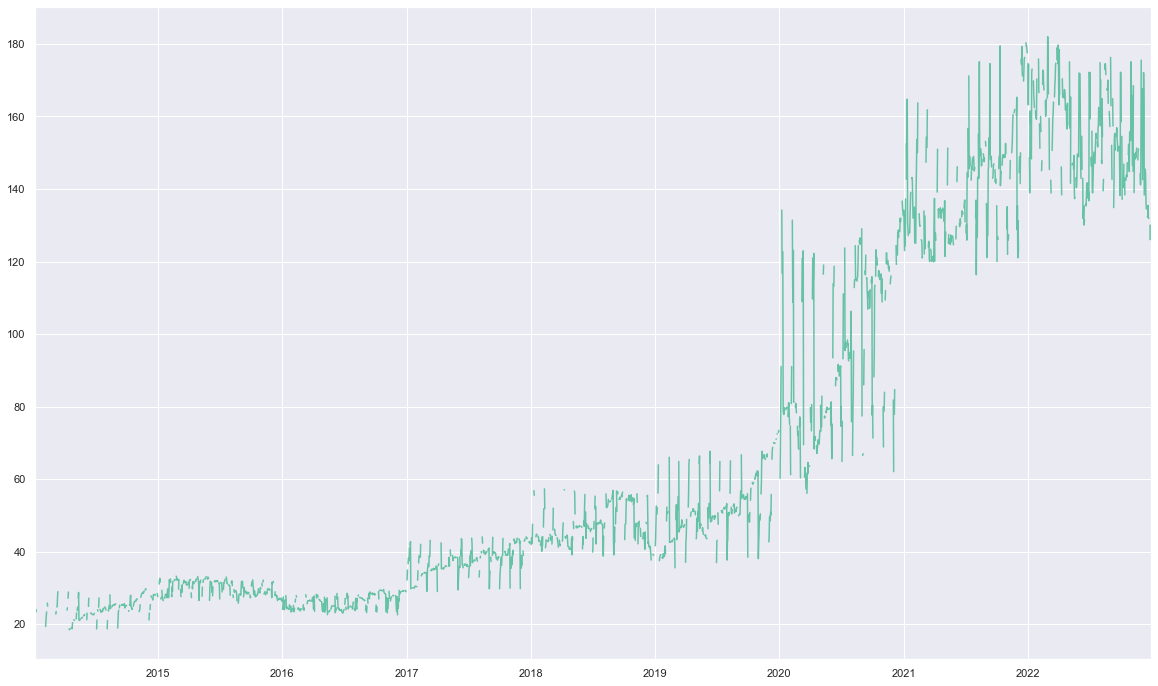

In [54]:
plot = df['Close'].plot(figsize=(20, 12))

In [55]:
df["Close"] = df["Close"].ffill()
df["NASDAQ"]=df["NASDAQ"].ffill()
df["Open"]=df["Open"].ffill()
df["High"]=df["High"].ffill()
df["Low"]=df["Low"].ffill()
df["Volume"]=df["Volume"].ffill()
df["Change"]=df["Change"].ffill()
df.head(12)

,Open,High,Low,Close,Volume,NASDAQ,Change
2014-01-04,19.205713,19.352501,19.170357,19.344643,200760000.0,3658.399902,NaN
2014-01-05,21.142857,21.242857,20.941429,21.124287,244048000.0,3594.360107,0.049645
2014-01-06,21.142857,21.242857,20.941429,21.124287,244048000.0,3594.360107,0.049645
2014-01-07,23.379999,23.517500,23.282499,23.379999,152892000.0,3894.330078,0.147499
2014-01-08,23.725000,24.155001,23.702499,24.032499,194044000.0,3879.669922,0.132499
2014-01-09,23.725000,24.155001,23.702499,24.032499,194044000.0,3879.669922,0.132499
2014-01-10,25.147499,25.172501,24.674999,24.795000,205965200.0,3984.739990,-0.392500
2014-01-11,25.147499,25.172501,24.674999,24.795000,205965200.0,3984.739990,-0.392500
2014-01-12,29.702499,29.812500,27.817499,28.767500,335256000.0,4287.810059,-0.965000
2014-01-13,29.702499,29.812500,27.817499,28.767500,335256000.0,4287.810059,-0.965000


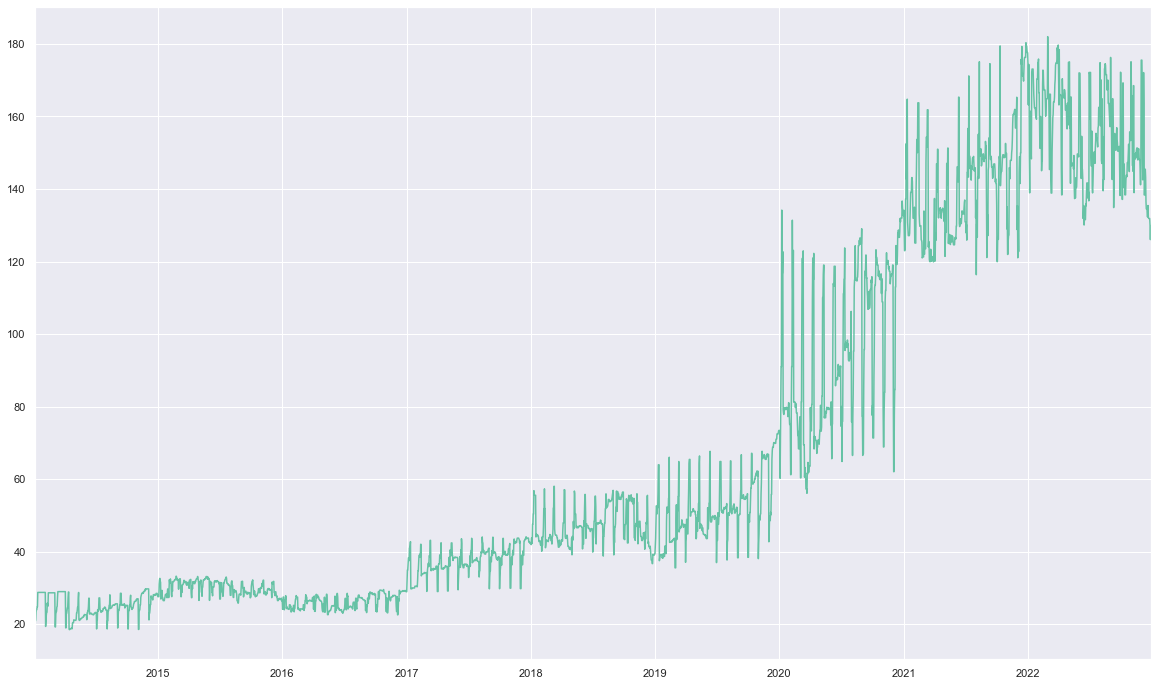

In [56]:
plot = df[ "Close"].plot(figsize=(20, 12))

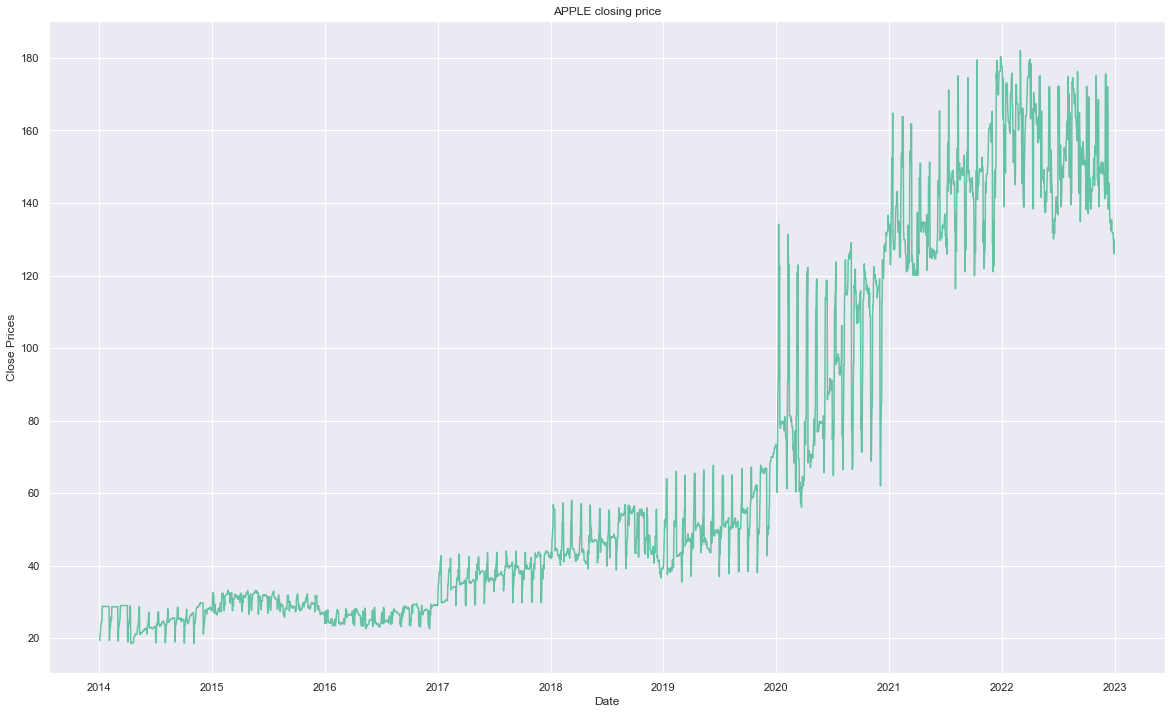

In [57]:
#plot close price
plt.figure(figsize=(20,12))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df['Close'])
plt.title('APPLE closing price')
plt.show()

In [58]:
df=df["Close"]
df

2014-01-04     19.344643
2014-01-05     21.124287
2014-01-06     21.124287
2014-01-07     23.379999
2014-01-08     24.032499
                 ...    
2022-12-26    131.860001
2022-12-27    130.029999
2022-12-28    126.040001
2022-12-29    129.610001
2022-12-30    129.929993
Freq: D, Name: Close, Length: 3283, dtype: float64

<AxesSubplot:>

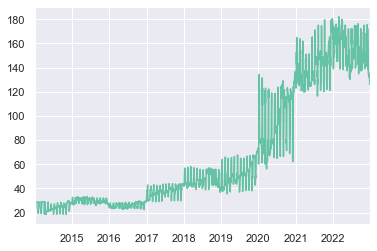

In [59]:
df.plot()

# Build model

In [60]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [61]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(df, WINDOW_SIZE)
X1.shape, y1.shape

((3278, 5, 1), (3278,))

# Train test split

In [62]:
X_train1, y_train1 = X1[:2922], y1[:2922]
X_test1, y_test1 = X1[2922:], y1[2922:]
X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape

((2922, 5, 1), (2922,), (356, 5, 1), (356,))

In [63]:
model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [65]:
model1.fit(X_train1, y_train1, epochs=100, callbacks=[cp1])

Epoch 1/100
88/92 [===========================>..] - ETA: 0s - loss: 4769.0801 - root_mean_squared_error: 69.0585

92/92 [==============================] - 6s 30ms/step - loss: 4759.6196 - root_mean_squared_error: 68.9900
Epoch 2/100
90/92 [============================>.] - ETA: 0s - loss: 4594.0469 - root_mean_squared_error: 67.7794

92/92 [==============================] - 1s 7ms/step - loss: 4599.3569 - root_mean_squared_error: 67.8186
Epoch 3/100
92/92 [==============================] - ETA: 0s - loss: 4390.1074 - root_mean_squared_error: 66.2579

92/92 [==============================] - 1s 7ms/step - loss: 4390.1074 - root_mean_squared_error: 66.2579
Epoch 4/100
85/92 [==========================>...] - ETA: 0s - loss: 4140.0664 - root_mean_squared_error: 64.3433

92/92 [==============================] - 1s 6ms/step - loss: 4146.0918 - root_mean_squared_error: 64.3902
Epoch 5/100
90/92 [============================>.] - ETA: 0s - loss: 3873.6362 - root_mean_squared_error: 62.2385

92/92 [==============================] - 1s 6ms/step - loss: 3873.5061 - root_mean_squared_error: 62.2375
Epoch 6/100
91/92 [============================>.] - ETA: 0s - loss: 3551.2317 - root_mean_squared_error: 59.5922

92/92 [==============================] - 1s 7ms/step - loss: 3544.5154 - root_mean_squared_error: 59.5358
Epoch 7/100
88/92 [===========================>..] - ETA: 0s - loss: 3226.7422 - root_mean_squared_error: 56.8044

92/92 [==============================] - 1s 7ms/step - loss: 3226.9055 - root_mean_squared_error: 56.8059
Epoch 8/100
81/92 [=========================>....] - ETA: 0s - loss: 2930.1416 - root_mean_squared_error: 54.1308

92/92 [==============================] - 1s 6ms/step - loss: 2958.7510 - root_mean_squared_error: 54.3944
Epoch 9/100
85/92 [==========================>...] - ETA: 0s - loss: 2756.1648 - root_mean_squared_error: 52.4992

92/92 [==============================] - 1s 7ms/step - loss: 2735.5745 - root_mean_squared_error: 52.3027
Epoch 10/100
92/92 [==============================] - ETA: 0s - loss: 2550.4973 - root_mean_squared_error: 50.5024

92/92 [==============================] - 1s 8ms/step - loss: 2550.4973 - root_mean_squared_error: 50.5024
Epoch 11/100
92/92 [==============================] - ETA: 0s - loss: 2402.6536 - root_mean_squared_error: 49.0169

92/92 [==============================] - 1s 9ms/step - loss: 2402.6536 - root_mean_squared_error: 49.0169
Epoch 12/100
92/92 [==============================] - ETA: 0s - loss: 2282.2554 - root_mean_squared_error: 47.7730

92/92 [==============================] - 1s 9ms/step - loss: 2282.2554 - root_mean_squared_error: 47.7730
Epoch 13/100
86/92 [===========================>..] - ETA: 0s - loss: 2174.5737 - root_mean_squared_error: 46.6323

92/92 [==============================] - 1s 9ms/step - loss: 2182.0339 - root_mean_squared_error: 46.7122
Epoch 14/100
91/92 [============================>.] - ETA: 0s - loss: 2089.5056 - root_mean_squared_error: 45.7111

92/92 [==============================] - 1s 8ms/step - loss: 2088.0762 - root_mean_squared_error: 45.6955
Epoch 15/100
84/92 [==========================>...] - ETA: 0s - loss: 2025.7787 - root_mean_squared_error: 45.0087

92/92 [==============================] - 1s 8ms/step - loss: 1995.7555 - root_mean_squared_error: 44.6739
Epoch 16/100
87/92 [===========================>..] - ETA: 0s - loss: 1897.0579 - root_mean_squared_error: 43.5552

92/92 [==============================] - 1s 6ms/step - loss: 1897.0479 - root_mean_squared_error: 43.5551
Epoch 17/100
88/92 [===========================>..] - ETA: 0s - loss: 1799.2999 - root_mean_squared_error: 42.4182

92/92 [==============================] - 1s 6ms/step - loss: 1802.8539 - root_mean_squared_error: 42.4600
Epoch 18/100
91/92 [============================>.] - ETA: 0s - loss: 1716.6185 - root_mean_squared_error: 41.4321

92/92 [==============================] - 1s 5ms/step - loss: 1714.6949 - root_mean_squared_error: 41.4089
Epoch 19/100
86/92 [===========================>..] - ETA: 0s - loss: 1671.5155 - root_mean_squared_error: 40.8842

92/92 [==============================] - 1s 6ms/step - loss: 1632.4583 - root_mean_squared_error: 40.4037
Epoch 20/100
91/92 [============================>.] - ETA: 0s - loss: 1554.6769 - root_mean_squared_error: 39.4294

92/92 [==============================] - 0s 5ms/step - loss: 1554.0153 - root_mean_squared_error: 39.4210
Epoch 21/100
81/92 [=========================>....] - ETA: 0s - loss: 1523.1721 - root_mean_squared_error: 39.0278

92/92 [==============================] - 1s 5ms/step - loss: 1479.1864 - root_mean_squared_error: 38.4602
Epoch 22/100
92/92 [==============================] - ETA: 0s - loss: 1407.0817 - root_mean_squared_error: 37.5111

92/92 [==============================] - 1s 6ms/step - loss: 1407.0817 - root_mean_squared_error: 37.5111
Epoch 23/100
88/92 [===========================>..] - ETA: 0s - loss: 1355.9825 - root_mean_squared_error: 36.8237

92/92 [==============================] - 1s 6ms/step - loss: 1338.0946 - root_mean_squared_error: 36.5800
Epoch 24/100
92/92 [==============================] - ETA: 0s - loss: 1270.6016 - root_mean_squared_error: 35.6455

92/92 [==============================] - 1s 7ms/step - loss: 1270.6016 - root_mean_squared_error: 35.6455
Epoch 25/100
87/92 [===========================>..] - ETA: 0s - loss: 1195.3688 - root_mean_squared_error: 34.5741

92/92 [==============================] - 0s 5ms/step - loss: 1204.7653 - root_mean_squared_error: 34.7097
Epoch 26/100
83/92 [==========================>...] - ETA: 0s - loss: 1166.3729 - root_mean_squared_error: 34.1522

92/92 [==============================] - 1s 6ms/step - loss: 1141.8854 - root_mean_squared_error: 33.7918
Epoch 27/100
85/92 [==========================>...] - ETA: 0s - loss: 1081.8468 - root_mean_squared_error: 32.8914

92/92 [==============================] - 1s 6ms/step - loss: 1080.5083 - root_mean_squared_error: 32.8711
Epoch 28/100
90/92 [============================>.] - ETA: 0s - loss: 1033.6527 - root_mean_squared_error: 32.1505

92/92 [==============================] - 1s 5ms/step - loss: 1021.3331 - root_mean_squared_error: 31.9583
Epoch 29/100
84/92 [==========================>...] - ETA: 0s - loss: 972.7289 - root_mean_squared_error: 31.1886

92/92 [==============================] - 0s 5ms/step - loss: 964.1480 - root_mean_squared_error: 31.0507
Epoch 30/100
89/92 [============================>.] - ETA: 0s - loss: 913.4912 - root_mean_squared_error: 30.2240

92/92 [==============================] - 1s 6ms/step - loss: 908.6472 - root_mean_squared_error: 30.1438
Epoch 31/100
88/92 [===========================>..] - ETA: 0s - loss: 851.1607 - root_mean_squared_error: 29.1747

92/92 [==============================] - 1s 7ms/step - loss: 855.5103 - root_mean_squared_error: 29.2491
Epoch 32/100
89/92 [============================>.] - ETA: 0s - loss: 801.6927 - root_mean_squared_error: 28.3142

92/92 [==============================] - 1s 7ms/step - loss: 804.2563 - root_mean_squared_error: 28.3594
Epoch 33/100
92/92 [==============================] - ETA: 0s - loss: 755.0592 - root_mean_squared_error: 27.4783

92/92 [==============================] - 1s 7ms/step - loss: 755.0592 - root_mean_squared_error: 27.4783
Epoch 34/100
82/92 [=========================>....] - ETA: 0s - loss: 714.2283 - root_mean_squared_error: 26.7250

92/92 [==============================] - 0s 5ms/step - loss: 708.0916 - root_mean_squared_error: 26.6100
Epoch 35/100
90/92 [============================>.] - ETA: 0s - loss: 664.7097 - root_mean_squared_error: 25.7820

92/92 [==============================] - 1s 6ms/step - loss: 663.3361 - root_mean_squared_error: 25.7553
Epoch 36/100
87/92 [===========================>..] - ETA: 0s - loss: 625.3950 - root_mean_squared_error: 25.0079

92/92 [==============================] - 1s 6ms/step - loss: 620.2900 - root_mean_squared_error: 24.9056
Epoch 37/100
86/92 [===========================>..] - ETA: 0s - loss: 577.6135 - root_mean_squared_error: 24.0336

92/92 [==============================] - 1s 6ms/step - loss: 579.2041 - root_mean_squared_error: 24.0667
Epoch 38/100
86/92 [===========================>..] - ETA: 0s - loss: 547.3083 - root_mean_squared_error: 23.3946

92/92 [==============================] - 1s 6ms/step - loss: 540.2938 - root_mean_squared_error: 23.2442
Epoch 39/100
82/92 [=========================>....] - ETA: 0s - loss: 508.0049 - root_mean_squared_error: 22.5390

92/92 [==============================] - 0s 5ms/step - loss: 503.0679 - root_mean_squared_error: 22.4292
Epoch 40/100
87/92 [===========================>..] - ETA: 0s - loss: 464.2429 - root_mean_squared_error: 21.5463

92/92 [==============================] - 0s 5ms/step - loss: 467.3187 - root_mean_squared_error: 21.6176
Epoch 41/100
88/92 [===========================>..] - ETA: 0s - loss: 430.8844 - root_mean_squared_error: 20.7578

92/92 [==============================] - 1s 6ms/step - loss: 433.6726 - root_mean_squared_error: 20.8248
Epoch 42/100
88/92 [===========================>..] - ETA: 0s - loss: 406.4966 - root_mean_squared_error: 20.1618

92/92 [==============================] - 1s 6ms/step - loss: 401.6948 - root_mean_squared_error: 20.0423
Epoch 43/100
89/92 [============================>.] - ETA: 0s - loss: 370.4309 - root_mean_squared_error: 19.2466

92/92 [==============================] - 1s 6ms/step - loss: 371.6866 - root_mean_squared_error: 19.2792
Epoch 44/100
85/92 [==========================>...] - ETA: 0s - loss: 344.8223 - root_mean_squared_error: 18.5694

92/92 [==============================] - 0s 5ms/step - loss: 343.6502 - root_mean_squared_error: 18.5378
Epoch 45/100
83/92 [==========================>...] - ETA: 0s - loss: 322.8545 - root_mean_squared_error: 17.9682

92/92 [==============================] - 0s 5ms/step - loss: 317.3916 - root_mean_squared_error: 17.8155
Epoch 46/100
83/92 [==========================>...] - ETA: 0s - loss: 300.3759 - root_mean_squared_error: 17.3314

92/92 [==============================] - 0s 5ms/step - loss: 292.6445 - root_mean_squared_error: 17.1069
Epoch 47/100
83/92 [==========================>...] - ETA: 0s - loss: 270.5076 - root_mean_squared_error: 16.4471

92/92 [==============================] - 0s 5ms/step - loss: 269.2729 - root_mean_squared_error: 16.4095
Epoch 48/100
83/92 [==========================>...] - ETA: 0s - loss: 252.5482 - root_mean_squared_error: 15.8918

92/92 [==============================] - 0s 5ms/step - loss: 247.7979 - root_mean_squared_error: 15.7416
Epoch 49/100
83/92 [==========================>...] - ETA: 0s - loss: 222.9575 - root_mean_squared_error: 14.9318

92/92 [==============================] - 0s 5ms/step - loss: 227.9051 - root_mean_squared_error: 15.0965
Epoch 50/100
89/92 [============================>.] - ETA: 0s - loss: 211.4874 - root_mean_squared_error: 14.5426

92/92 [==============================] - 0s 5ms/step - loss: 209.6633 - root_mean_squared_error: 14.4798
Epoch 51/100
88/92 [===========================>..] - ETA: 0s - loss: 191.9956 - root_mean_squared_error: 13.8562

92/92 [==============================] - 1s 6ms/step - loss: 192.7092 - root_mean_squared_error: 13.8820
Epoch 52/100
89/92 [============================>.] - ETA: 0s - loss: 176.7227 - root_mean_squared_error: 13.2937

92/92 [==============================] - 0s 5ms/step - loss: 177.2192 - root_mean_squared_error: 13.3124
Epoch 53/100
83/92 [==========================>...] - ETA: 0s - loss: 163.8620 - root_mean_squared_error: 12.8009

92/92 [==============================] - 1s 6ms/step - loss: 163.1108 - root_mean_squared_error: 12.7715
Epoch 54/100
89/92 [============================>.] - ETA: 0s - loss: 152.5767 - root_mean_squared_error: 12.3522

92/92 [==============================] - 1s 7ms/step - loss: 150.1835 - root_mean_squared_error: 12.2549
Epoch 55/100
92/92 [==============================] - ETA: 0s - loss: 138.3002 - root_mean_squared_error: 11.7601

92/92 [==============================] - 1s 7ms/step - loss: 138.3002 - root_mean_squared_error: 11.7601
Epoch 56/100
92/92 [==============================] - ETA: 0s - loss: 127.6722 - root_mean_squared_error: 11.2992

92/92 [==============================] - 1s 7ms/step - loss: 127.6722 - root_mean_squared_error: 11.2992
Epoch 57/100
83/92 [==========================>...] - ETA: 0s - loss: 120.6142 - root_mean_squared_error: 10.9824

92/92 [==============================] - 1s 7ms/step - loss: 117.9819 - root_mean_squared_error: 10.8619
Epoch 58/100
87/92 [===========================>..] - ETA: 0s - loss: 109.3283 - root_mean_squared_error: 10.4560

92/92 [==============================] - 1s 7ms/step - loss: 109.3119 - root_mean_squared_error: 10.4552
Epoch 59/100
89/92 [============================>.] - ETA: 0s - loss: 101.8743 - root_mean_squared_error: 10.0933

92/92 [==============================] - 1s 7ms/step - loss: 101.4141 - root_mean_squared_error: 10.0705
Epoch 60/100
91/92 [============================>.] - ETA: 0s - loss: 94.5144 - root_mean_squared_error: 9.7219

92/92 [==============================] - 1s 7ms/step - loss: 94.3630 - root_mean_squared_error: 9.7141
Epoch 61/100
89/92 [============================>.] - ETA: 0s - loss: 87.2869 - root_mean_squared_error: 9.3427

92/92 [==============================] - 1s 8ms/step - loss: 87.7088 - root_mean_squared_error: 9.3653
Epoch 62/100
84/92 [==========================>...] - ETA: 0s - loss: 82.7187 - root_mean_squared_error: 9.0950

92/92 [==============================] - 1s 7ms/step - loss: 81.6278 - root_mean_squared_error: 9.0348
Epoch 63/100
86/92 [===========================>..] - ETA: 0s - loss: 74.4082 - root_mean_squared_error: 8.6260

92/92 [==============================] - 1s 7ms/step - loss: 76.4917 - root_mean_squared_error: 8.7460
Epoch 64/100
89/92 [============================>.] - ETA: 0s - loss: 71.6128 - root_mean_squared_error: 8.4624

92/92 [==============================] - 1s 8ms/step - loss: 71.6610 - root_mean_squared_error: 8.4653
Epoch 65/100
92/92 [==============================] - ETA: 0s - loss: 67.3063 - root_mean_squared_error: 8.2040

92/92 [==============================] - 1s 7ms/step - loss: 67.3063 - root_mean_squared_error: 8.2040
Epoch 66/100
90/92 [============================>.] - ETA: 0s - loss: 63.2493 - root_mean_squared_error: 7.9529

92/92 [==============================] - 1s 7ms/step - loss: 63.3761 - root_mean_squared_error: 7.9609
Epoch 67/100
91/92 [============================>.] - ETA: 0s - loss: 59.6073 - root_mean_squared_error: 7.7206

92/92 [==============================] - 1s 7ms/step - loss: 59.9118 - root_mean_squared_error: 7.7403
Epoch 68/100
91/92 [============================>.] - ETA: 0s - loss: 56.2111 - root_mean_squared_error: 7.4974

92/92 [==============================] - 1s 7ms/step - loss: 56.5253 - root_mean_squared_error: 7.5183
Epoch 69/100
88/92 [===========================>..] - ETA: 0s - loss: 54.5892 - root_mean_squared_error: 7.3885

92/92 [==============================] - 1s 8ms/step - loss: 53.6771 - root_mean_squared_error: 7.3265
Epoch 70/100
92/92 [==============================] - ETA: 0s - loss: 51.2294 - root_mean_squared_error: 7.1575

92/92 [==============================] - 1s 7ms/step - loss: 51.2294 - root_mean_squared_error: 7.1575
Epoch 71/100
90/92 [============================>.] - ETA: 0s - loss: 48.4796 - root_mean_squared_error: 6.9627

92/92 [==============================] - 1s 7ms/step - loss: 48.7271 - root_mean_squared_error: 6.9805
Epoch 72/100
86/92 [===========================>..] - ETA: 0s - loss: 46.9231 - root_mean_squared_error: 6.8500

92/92 [==============================] - 1s 8ms/step - loss: 46.7017 - root_mean_squared_error: 6.8339
Epoch 73/100
92/92 [==============================] - ETA: 0s - loss: 44.9285 - root_mean_squared_error: 6.7029

92/92 [==============================] - 1s 7ms/step - loss: 44.9285 - root_mean_squared_error: 6.7029
Epoch 74/100
85/92 [==========================>...] - ETA: 0s - loss: 44.0883 - root_mean_squared_error: 6.6399

92/92 [==============================] - 1s 7ms/step - loss: 43.1102 - root_mean_squared_error: 6.5658
Epoch 75/100
83/92 [==========================>...] - ETA: 0s - loss: 41.0202 - root_mean_squared_error: 6.4047

92/92 [==============================] - 1s 6ms/step - loss: 41.5996 - root_mean_squared_error: 6.4498
Epoch 76/100
89/92 [============================>.] - ETA: 0s - loss: 40.9526 - root_mean_squared_error: 6.3994

92/92 [==============================] - 0s 5ms/step - loss: 40.1356 - root_mean_squared_error: 6.3353
Epoch 77/100
87/92 [===========================>..] - ETA: 0s - loss: 39.4123 - root_mean_squared_error: 6.2779

92/92 [==============================] - 1s 7ms/step - loss: 38.9323 - root_mean_squared_error: 6.2396
Epoch 78/100
91/92 [============================>.] - ETA: 0s - loss: 37.3707 - root_mean_squared_error: 6.1132

92/92 [==============================] - 0s 5ms/step - loss: 37.8719 - root_mean_squared_error: 6.1540
Epoch 79/100
83/92 [==========================>...] - ETA: 0s - loss: 36.5073 - root_mean_squared_error: 6.0421

92/92 [==============================] - 0s 5ms/step - loss: 36.7169 - root_mean_squared_error: 6.0594
Epoch 80/100
89/92 [============================>.] - ETA: 0s - loss: 36.0151 - root_mean_squared_error: 6.0013

92/92 [==============================] - 1s 5ms/step - loss: 35.8638 - root_mean_squared_error: 5.9886
Epoch 81/100
83/92 [==========================>...] - ETA: 0s - loss: 35.9860 - root_mean_squared_error: 5.9988

92/92 [==============================] - 0s 5ms/step - loss: 35.2563 - root_mean_squared_error: 5.9377
Epoch 82/100
86/92 [===========================>..] - ETA: 0s - loss: 34.2144 - root_mean_squared_error: 5.8493

92/92 [==============================] - 1s 6ms/step - loss: 34.3645 - root_mean_squared_error: 5.8621
Epoch 83/100
91/92 [============================>.] - ETA: 0s - loss: 33.6871 - root_mean_squared_error: 5.8041

92/92 [==============================] - 0s 5ms/step - loss: 33.5725 - root_mean_squared_error: 5.7942
Epoch 84/100
80/92 [=========================>....] - ETA: 0s - loss: 33.3742 - root_mean_squared_error: 5.7770

92/92 [==============================] - 1s 6ms/step - loss: 33.1682 - root_mean_squared_error: 5.7592
Epoch 85/100
81/92 [=========================>....] - ETA: 0s - loss: 32.1186 - root_mean_squared_error: 5.6673

92/92 [==============================] - 0s 5ms/step - loss: 32.7586 - root_mean_squared_error: 5.7235
Epoch 86/100
91/92 [============================>.] - ETA: 0s - loss: 32.2777 - root_mean_squared_error: 5.6813

92/92 [==============================] - 1s 5ms/step - loss: 32.1807 - root_mean_squared_error: 5.6728
Epoch 87/100
84/92 [==========================>...] - ETA: 0s - loss: 31.0631 - root_mean_squared_error: 5.5734

92/92 [==============================] - 0s 5ms/step - loss: 31.4973 - root_mean_squared_error: 5.6122
Epoch 88/100
85/92 [==========================>...] - ETA: 0s - loss: 30.8498 - root_mean_squared_error: 5.5543

92/92 [==============================] - 0s 5ms/step - loss: 31.3668 - root_mean_squared_error: 5.6006
Epoch 89/100
87/92 [===========================>..] - ETA: 0s - loss: 31.0335 - root_mean_squared_error: 5.5708

92/92 [==============================] - 0s 5ms/step - loss: 30.8094 - root_mean_squared_error: 5.5506
Epoch 90/100
92/92 [==============================] - ETA: 0s - loss: 30.5711 - root_mean_squared_error: 5.5291

92/92 [==============================] - 1s 6ms/step - loss: 30.5711 - root_mean_squared_error: 5.5291
Epoch 91/100
92/92 [==============================] - ETA: 0s - loss: 30.3642 - root_mean_squared_error: 5.5104

92/92 [==============================] - 1s 6ms/step - loss: 30.3642 - root_mean_squared_error: 5.5104
Epoch 92/100
89/92 [============================>.] - ETA: 0s - loss: 29.2017 - root_mean_squared_error: 5.4039

92/92 [==============================] - 0s 5ms/step - loss: 29.9366 - root_mean_squared_error: 5.4714
Epoch 93/100
86/92 [===========================>..] - ETA: 0s - loss: 29.0697 - root_mean_squared_error: 5.3916

92/92 [==============================] - 0s 5ms/step - loss: 29.7913 - root_mean_squared_error: 5.4581
Epoch 94/100
81/92 [=========================>....] - ETA: 0s - loss: 29.5024 - root_mean_squared_error: 5.4316

92/92 [==============================] - 0s 5ms/step - loss: 29.5070 - root_mean_squared_error: 5.4320
Epoch 95/100
90/92 [============================>.] - ETA: 0s - loss: 29.7019 - root_mean_squared_error: 5.4499

92/92 [==============================] - 0s 5ms/step - loss: 29.3824 - root_mean_squared_error: 5.4205
Epoch 96/100
92/92 [==============================] - ETA: 0s - loss: 29.2892 - root_mean_squared_error: 5.4119

92/92 [==============================] - 1s 5ms/step - loss: 29.2892 - root_mean_squared_error: 5.4119
Epoch 97/100
86/92 [===========================>..] - ETA: 0s - loss: 28.1033 - root_mean_squared_error: 5.3013

92/92 [==============================] - 1s 6ms/step - loss: 28.8407 - root_mean_squared_error: 5.3704
Epoch 98/100
92/92 [==============================] - ETA: 0s - loss: 28.7942 - root_mean_squared_error: 5.3660

92/92 [==============================] - 0s 5ms/step - loss: 28.7942 - root_mean_squared_error: 5.3660
Epoch 99/100
82/92 [=========================>....] - ETA: 0s - loss: 29.3736 - root_mean_squared_error: 5.4197

92/92 [==============================] - 0s 5ms/step - loss: 28.5451 - root_mean_squared_error: 5.3428
Epoch 100/100
85/92 [==========================>...] - ETA: 0s - loss: 29.0045 - root_mean_squared_error: 5.3856

92/92 [==============================] - 0s 5ms/step - loss: 28.5769 - root_mean_squared_error: 5.3457


In [66]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

92/92 [==============================] - 1s 3ms/step


,Train Predictions,Actuals
0,23.997332,24.032499
1,24.036880,24.795000
2,24.717745,24.795000
3,24.831942,28.767500
4,28.391003,28.767500
...,...,...
2917,154.108246,174.309998
2918,154.237671,174.309998
2919,154.302673,148.710007
2920,152.924820,138.929993


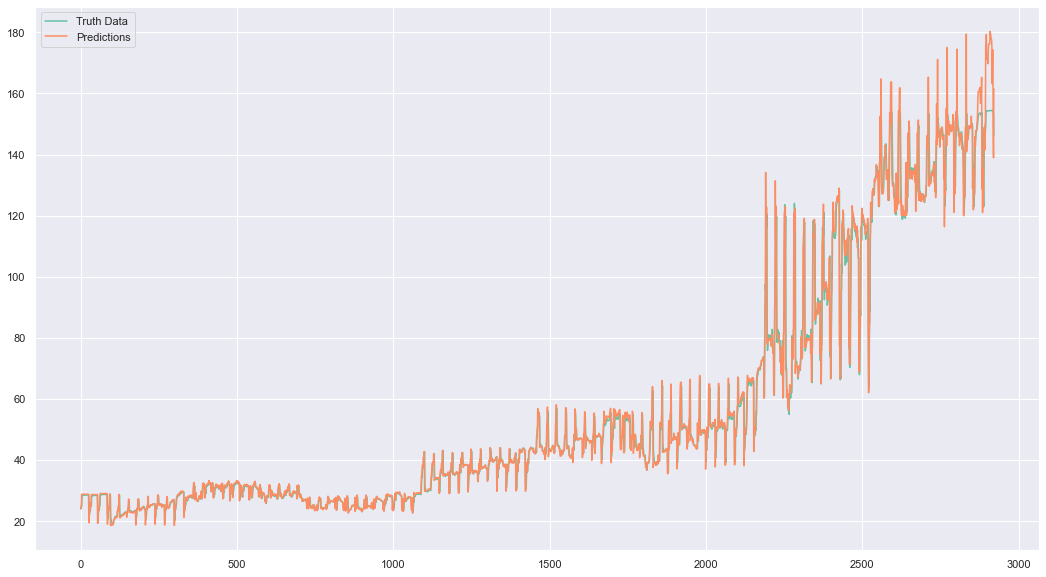

In [77]:
plt.figure(figsize=(18,10))
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])
plt.legend(['Truth Data', 'Predictions'])

In [78]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

12/12 [==============================] - 0s 5ms/step


,Test Predictions,Actuals
0,150.629684,157.960007
1,152.174255,157.960007
2,153.109970,150.649994
3,151.768158,148.309998
4,149.988083,172.190002
...,...,...
351,132.753983,131.860001
352,132.754135,130.029999
353,131.398605,126.040001
354,127.907272,129.610001


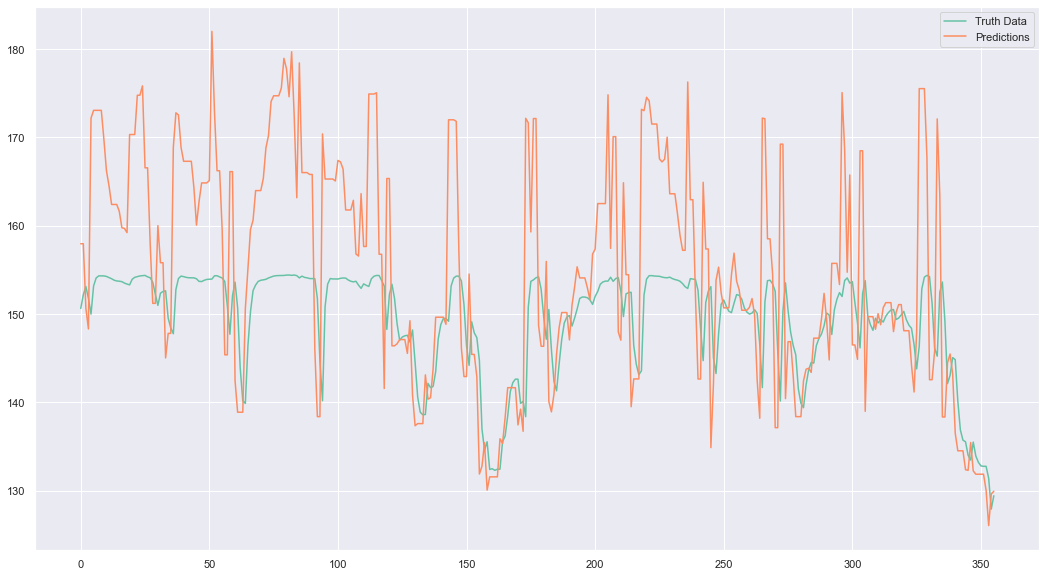

In [79]:
plt.figure(figsize=(18,10))
plt.plot(test_results['Test Predictions'][:356])
plt.plot(test_results['Actuals'][:356])
plt.legend(['Truth Data', 'Predictions'])

# Evaluating forecast results

In [ ]:
score = np.sqrt(mean_squared_error(test_results['Test Predictions'], test_results['Actuals']))
print(f'RMSE Score on Test set: {score:0.2f}')

In [ ]:
# report performance
mse = mean_squared_error(test_predictions, y_test1)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_predictions, y_test1)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_predictions, y_test1))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(y_test1 - test_predictions)/np.abs(test_predictions))
print('MAPE: '+str(mape))

In [ ]:
get_mda(y_test1,test_predictions)

In [ ]:
df.index

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])